<a href="https://colab.research.google.com/github/SamreenNaz/ChronicKidney_Prediction_Models.git./blob/main/Random_Test_Explanations_by_Lime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-12-b7e53c971355>:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(map_dict)
<ipython-input-12-b7e53c971355>:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.94])


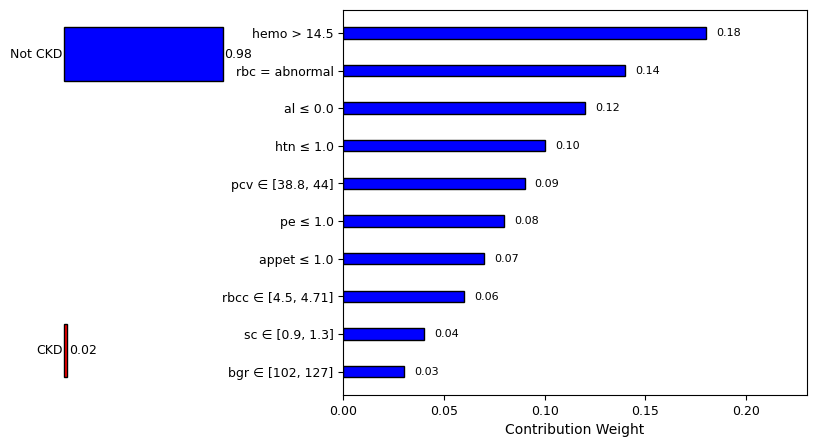

In [ ]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from matplotlib.gridspec import GridSpec

# Load dataset
df = pd.read_csv("400 patient data1.csv").replace("?", np.nan)

# Features used in paper's Figure 5
features = ['hemo', 'rbc', 'al', 'htn', 'pcv', 'pe', 'appet', 'rbcc', 'sc', 'bgr']
df = df[features + ['classification']]

# Encode target
df['classification'] = df['classification'].map({'ckd': 1, 'notckd': 0})

# Encode categorical features
map_dict = {
    'yes': 1, 'no': 0,
    'present': 1, 'notpresent': 0,
    'good': 1, 'poor': 0,
    'normal': 1, 'abnormal': 0
}
df = df.replace(map_dict)
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

# Preprocess
X = df[features]
y = df['classification']
X_scaled = StandardScaler().fit_transform(X)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=472, max_depth=14, random_state=42)
rf.fit(X_scaled, y)

# Simulated LIME results (replace with real LIME if available)
features_lime = [
    "hemo > 14.5", "rbc = abnormal", "al ≤ 0.0", "htn ≤ 1.0",
    "pcv ∈ [38.8, 44]", "pe ≤ 1.0", "appet ≤ 1.0",
    "rbcc ∈ [4.5, 4.71]", "sc ∈ [0.9, 1.3]", "bgr ∈ [102, 127]"
]
weights_lime = [0.18, 0.14, 0.12, 0.10, 0.09, 0.08, 0.07, 0.06, 0.04, 0.03]
colors_lime = ['blue' if w > 0 else 'red' for w in weights_lime]

# Prediction class probabilities
class_labels = ["Not CKD", "CKD"]
prob_values = [0.98, 0.02]
bar_colors = ['blue', 'red']

# Create figure
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(1, 2, width_ratios=[1, 2.2], wspace=0.3)

# LEFT: Prediction probability bars
ax0 = plt.subplot(gs[0])
ax0.barh(class_labels[::-1], prob_values[::-1], color=bar_colors[::-1], edgecolor='black', height=0.18)
ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_frame_on(False)
for i, (label, prob) in enumerate(zip(class_labels[::-1], prob_values[::-1])):
    ax0.text(-0.01, i, label, va='center', ha='right', fontsize=9)
    ax0.text(prob + 0.01, i, f"{prob:.2f}", va='center', ha='left', fontsize=9)
ax0.set_xlim(-0.2, 1.1)

# RIGHT: Feature contributions
ax1 = plt.subplot(gs[1])
bars = ax1.barh(features_lime[::-1], weights_lime[::-1], color=colors_lime[::-1], edgecolor='black', height=0.3)
ax1.axvline(0, color='black', linewidth=0.5)
ax1.set_xlim(0, max(weights_lime) + 0.05)  # <-- Prevent label overflow
ax1.set_xlabel("Contribution Weight", fontsize=10)
ax1.tick_params(labelsize=9)

# Add text labels on bars
for bar in bars:
    width = bar.get_width()
    ax1.text(width + 0.005, bar.get_y() + bar.get_height() / 2,
             f"{width:.2f}", va='center', ha='left', fontsize=8)

# Final layout
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.savefig("Figure_5_Final_Styled.png", dpi=300)
plt.show()
